## **Project - Bank Churn Prediction**

**Description** <br>
*Background and Context*

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

**Objective**

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Data Description**

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

**Data Dictionary**

*  CustomerId: Unique ID which is assigned to each customer
*  Surname: Last name of the customer 
*  CreditScore: It defines the credit history of the customer.  
*  Geography: A customer’s location    
*  Gender: It defines the Gender of the customer   
*  Age: Age of the customer     
*  Tenure: Number of years for which the customer has been with the bank
*  NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
*  Balance: Account balance
*  HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
*  EstimatedSalary: Estimated salary 
isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
*  Excited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values                    
  *  0=No ( Customer did not leave the bank )
  *  1=Yes ( Customer left the bank )

<hr>

***Bank Churn Prediction according the dataset is a classification project with a prediction whether the customer stay at the bank (excited:0) or leave the bank (excited:1)
We have to show the probability of churn, based on the customer features.***

<hr>

## import tensor flow show the version

In [1]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.6.0


## import packages

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from scipy.stats import zscore, mode
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
%matplotlib inline

### read the dataset show the data

In [5]:
bank_data = pd.read_csv('bank.csv')
bank_o=bank_data.copy()
bank_data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
bank_data.shape

(10000, 14)



*   there are 10000 rows and 14 columns



In [8]:
bank_data.drop(['RowNumber', 'CustomerId','Surname'], axis=1, inplace=True)

In [9]:
bank_data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5725,507,France,Female,33,1,113452.66,1,0,0,142911.99,0
8827,638,Spain,Male,41,7,0.00,2,1,0,43889.41,0
4746,757,France,Male,32,9,0.00,2,1,0,115950.96,0
1703,790,Germany,Male,42,1,85839.62,1,1,0,198182.73,0
8688,637,Germany,Male,40,9,154309.67,1,1,1,125334.16,1


In [10]:
bank_data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Statistical analysis

In [11]:
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00




*   Credit score minimum is 350 and with 500 more 850 is the maximum regarding the mean value of 650 the standard deviation is relatively small approx.97
*   Age is between 18 and 92 mean is 38 and the standard deviation is 10 we can say it is balanced
*   Tenure is the spent years with the bank between 0 and 10 years
*   Balance shows a wide range between 0 and 250k USD
*   The purchased products from the bank is the column NumOfProducts is between 1 and 4
*   HasCrCard is a categorical value 0 no credit card 1 has a credit card
*   Is active member 0: not active 1:active
*   Estimated salary is a wide range value between 11 and 200k with a huge standard deviation 57k






### searching for null values

In [12]:
bank_data.info()
print('*'*20)
bank_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
********************


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

*  There are 10000 instances in the dataset and there is no null value

### drop duplicates if exist

In [13]:
bank_data.drop_duplicates()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


* Geography and	Gender are categorical values should be converted in numerical values with dummy variables converting we can do the conversation

In [14]:
result = pd.DataFrame(bank_data.columns)
result.index +=1
print(result)

                  0
1       CreditScore
2         Geography
3            Gender
4               Age
5            Tenure
6           Balance
7     NumOfProducts
8         HasCrCard
9    IsActiveMember
10  EstimatedSalary
11           Exited


<hr>

## in the model as input I will use:
* 1       CreditScore
* 2         Geography
* 3            Gender
* 4               Age
* 5            Tenure
* 6           Balance
* 7     NumOfProducts
* 8         HasCrCard
* 9    IsActiveMember
* 10  EstimatedSalary

## in the model as target I will use:

* 11           Exited

<hr>

# Perform an Exploratory Data Analysis on the data

## univariate analysis

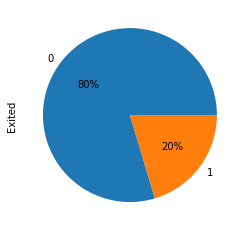

In [15]:
ax=bank_data.Exited.value_counts().plot.pie(autopct='%1.0f%%')

**80% stay at the bank and 20% leave the bank there are 2 categories** <br>
*target variable is unbalanced we have to separate the dataset with stratify*

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(feature, figsize=(12,10)):
    sns.set(rc={'axes.facecolor':'lightsteelblue', 'figure.facecolor':'cornflowerblue'})
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=figsize)
    fig.suptitle(feature.name)
    sns.boxplot(x=feature, ax=ax1)
    sns.histplot(x=feature, ax=ax2,color='blue')
    
    mn=feature.mean()
    md=feature.median()
    sk=feature.skew()
    mo=mode(feature)[0][0]
    
    ax2.axvline(
        mn, color="red", linestyle="--"
    )  # Add mean to the histogram
    ax2.axvline(
        md, color="yellow", linestyle="-"
    )  # Add median to the histogram
    print("Analysis of the data of {}\n\nthe average {:.2f}\n the median {:.2f}\n the mode {:.2f}\n skewness {}" .format(feature.name, mn,md,mo,sk))
    
    
   

Analysis of the data of CreditScore

the average 650.53
 the median 652.00
 the mode 850.00
 skewness -0.07160660820092675


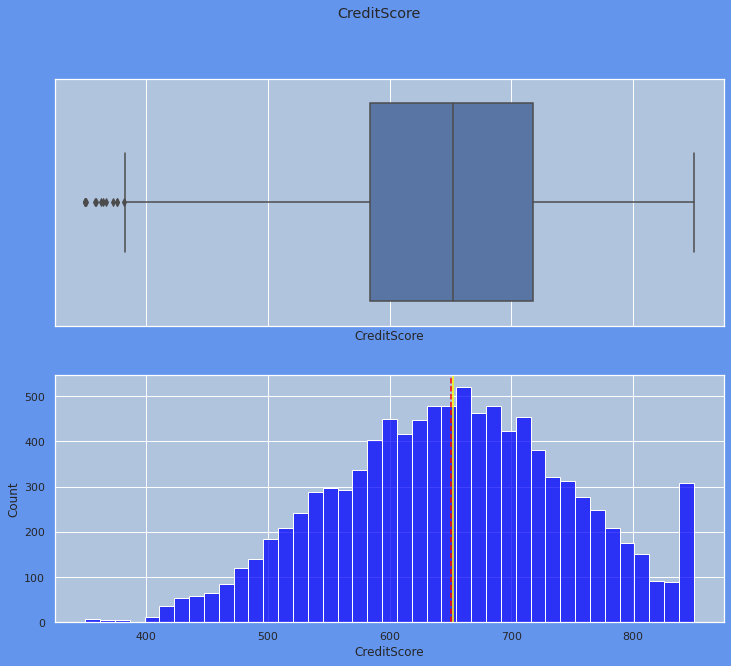

In [17]:
histogram_boxplot(bank_data['CreditScore'])

the credit score data are balanced there is a small diffenece between average and median

Analysis of the data of Age

the average 38.92
 the median 37.00
 the mode 37.00
 skewness 1.0113202630234552


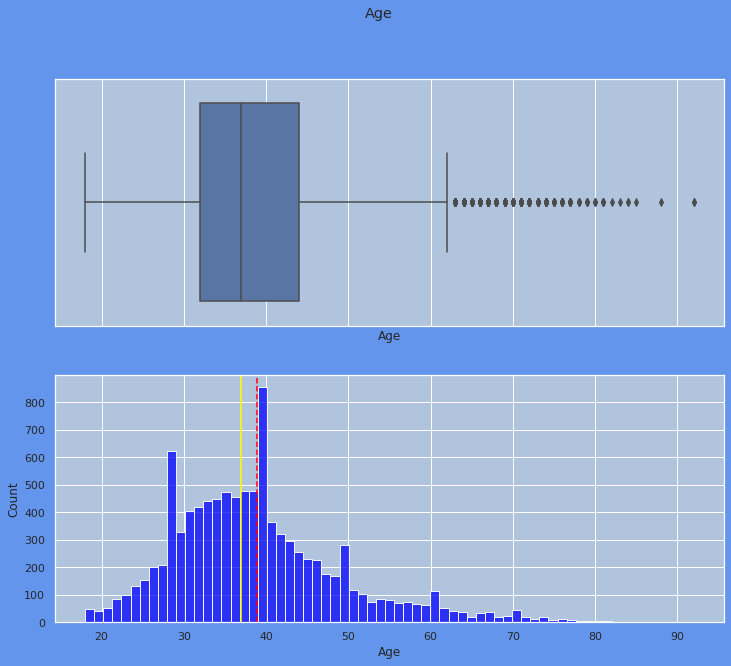

In [18]:
histogram_boxplot(bank_data['Age'])

there are some outliers in the age have to be handled average and median are close to each other

Analysis of the data of Tenure

the average 5.01
 the median 5.00
 the mode 2.00
 skewness 0.01099145797717904


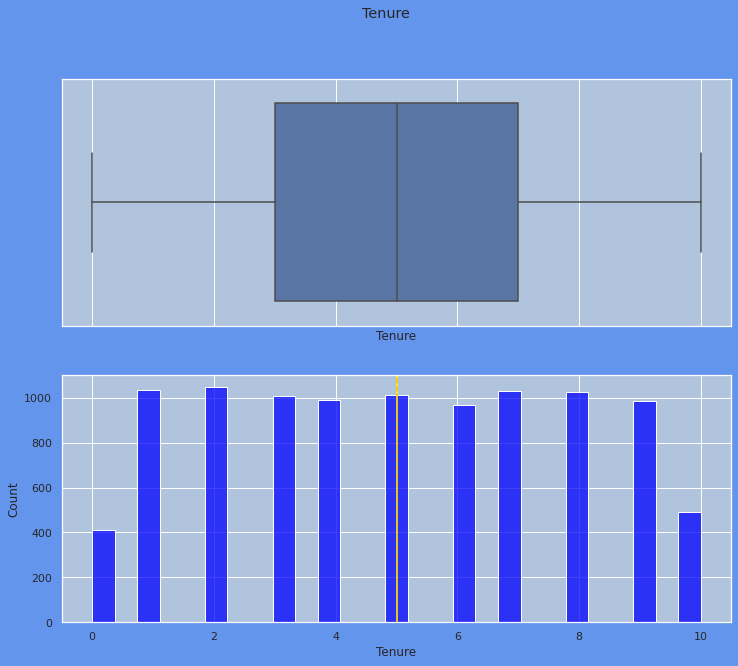

In [19]:
histogram_boxplot(bank_data['Tenure'])

5 years the average time at the bank for the customers

Analysis of the data of Balance

the average 76485.89
 the median 97198.54
 the mode 0.00
 skewness -0.14110871094154384


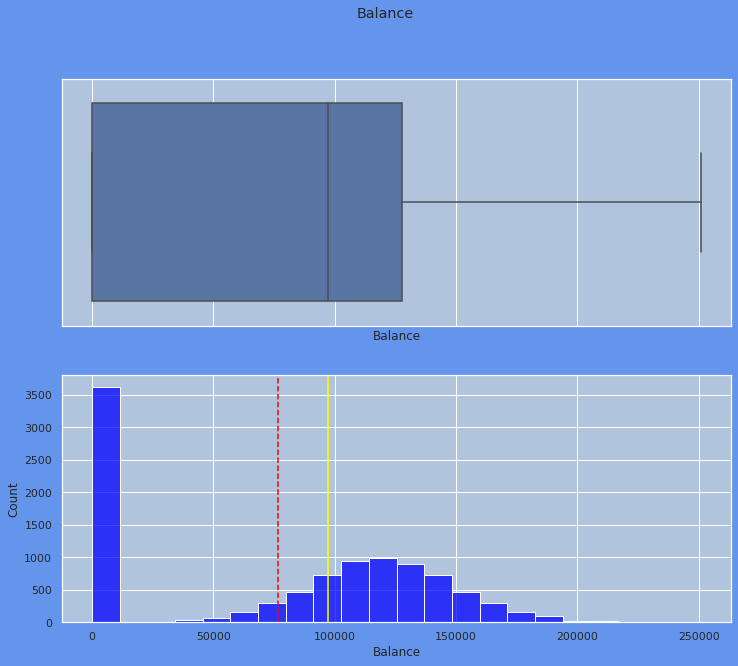

In [20]:
histogram_boxplot(bank_data['Balance'])

the balance on the customer accounts shows a little bit unbalanced values there are a lot of account where no money on it is

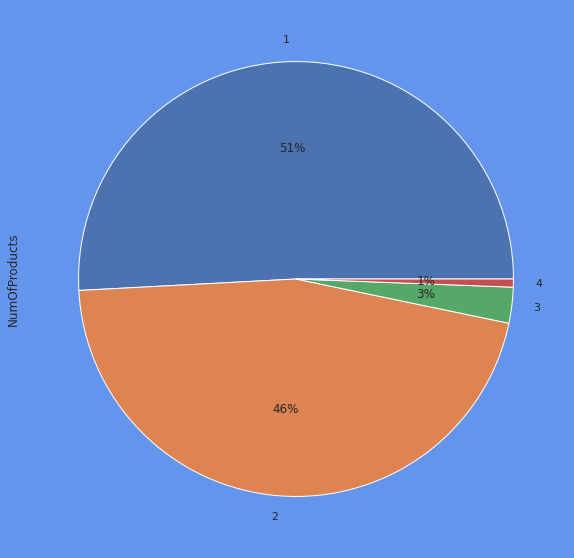

In [21]:
bank_data.NumOfProducts.value_counts().plot.pie(figsize=(12,10),autopct='%1.0f%%')

most of customer has only 1 or 2 products at the bank

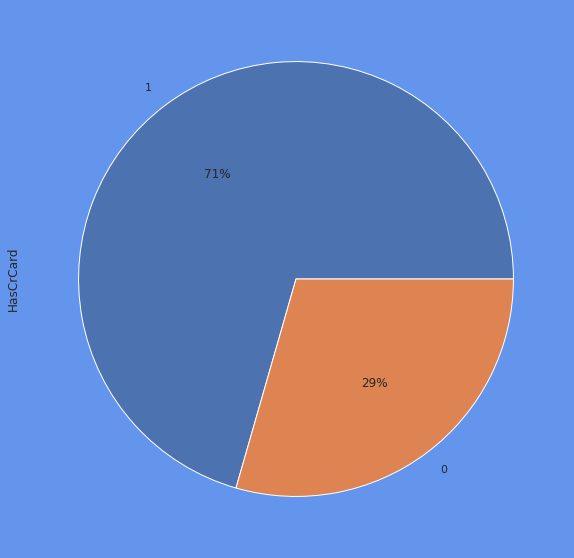

In [22]:
bank_data.HasCrCard.value_counts().plot.pie(figsize=(12,10),autopct='%1.0f%%')

approx. 70% of the cusmers has a credit card at the bank

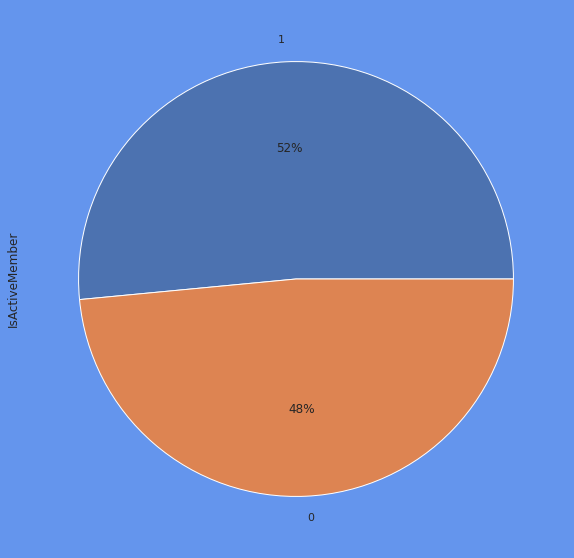

In [23]:
bank_data.IsActiveMember.value_counts().plot.pie(figsize=(12,10),autopct='%1.0f%%')

half of the customers can we regarding as active partner of the bank

Analysis of the data of EstimatedSalary

the average 100090.24
 the median 100193.91
 the mode 24924.92
 skewness 0.0020853576615585162


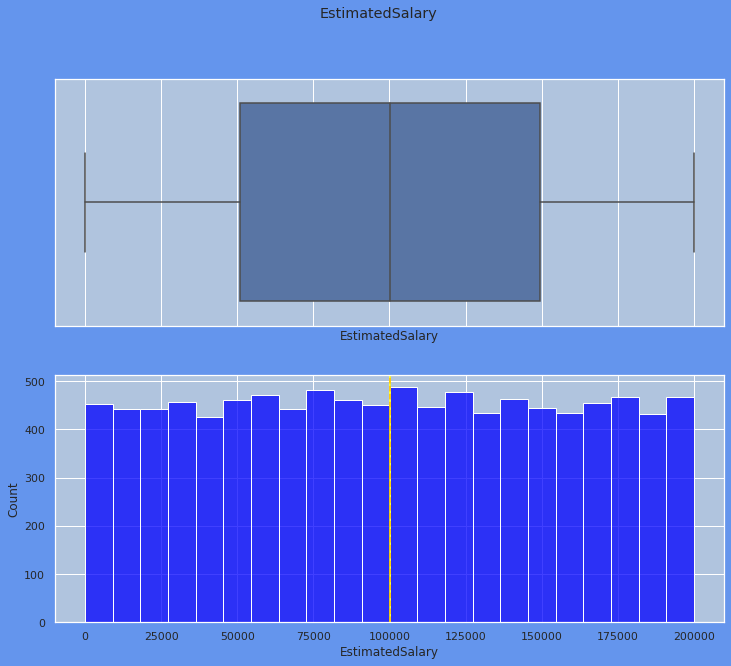

In [24]:
histogram_boxplot(bank_data['EstimatedSalary'])

We can see that the Estimated salary is a balanced value in the dataset

In [29]:
def cnt_plt(feature):
  plt.figure(figsize=(10,7))
  total = float(len(feature))
  ax = sns.countplot(x=feature, hue="Exited", data=bank_o)
  plt.title("Analysis of " +feature.name, fontsize=20)

  for p in ax.patches:
      percentage = '{:.1f}%'.format(100 * p.get_height()/total)
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax.annotate(percentage, (x, y),ha='center')
  plt.show()

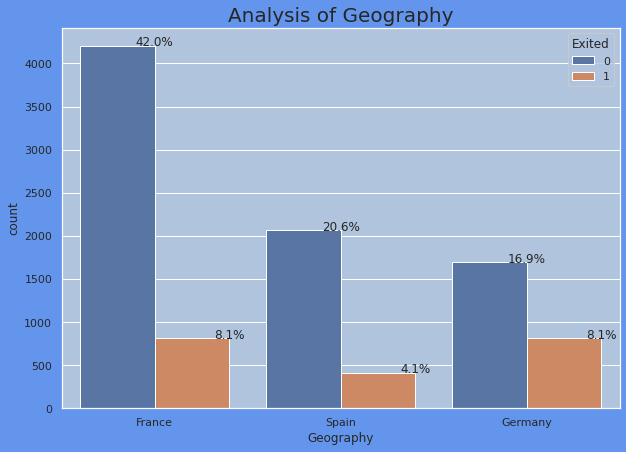

In [30]:
cnt_plt(bank_o['Geography'])

the most of data are from France approx. 50% Spain 25% and Germany also

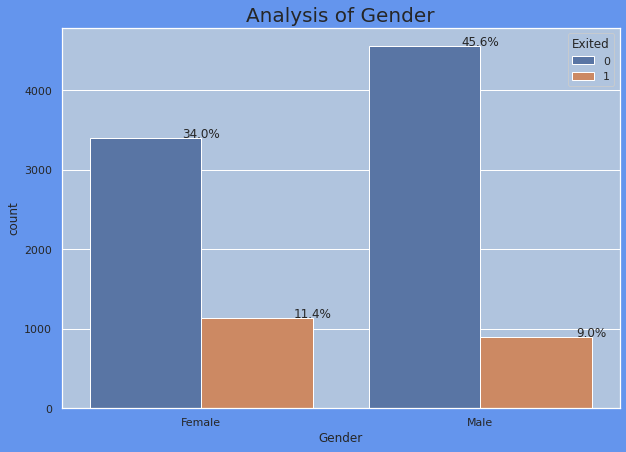

In [32]:
cnt_plt(bank_o['Gender'])

There are more male involved in the dataset with approx. 55% 

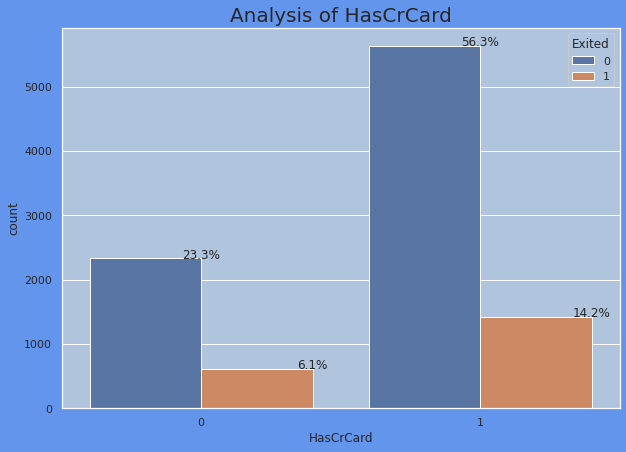

In [34]:
cnt_plt(bank_o['HasCrCard'])

more loyality of people who has a credit card at the bank

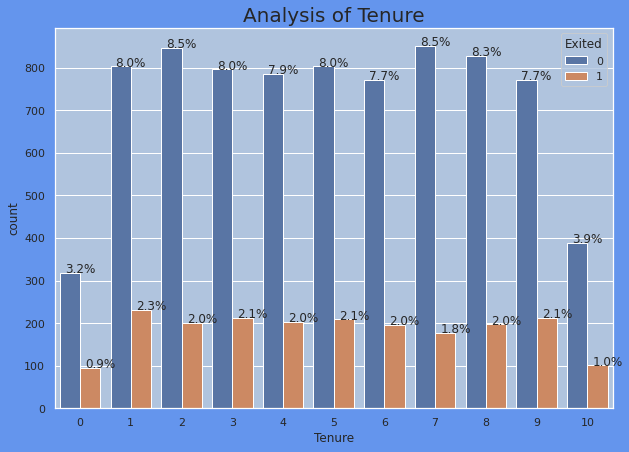

In [37]:
cnt_plt(bank_o['Tenure'])

with the spent years at the bank doesnt increase the loyality of the customer

### bivariate analysis

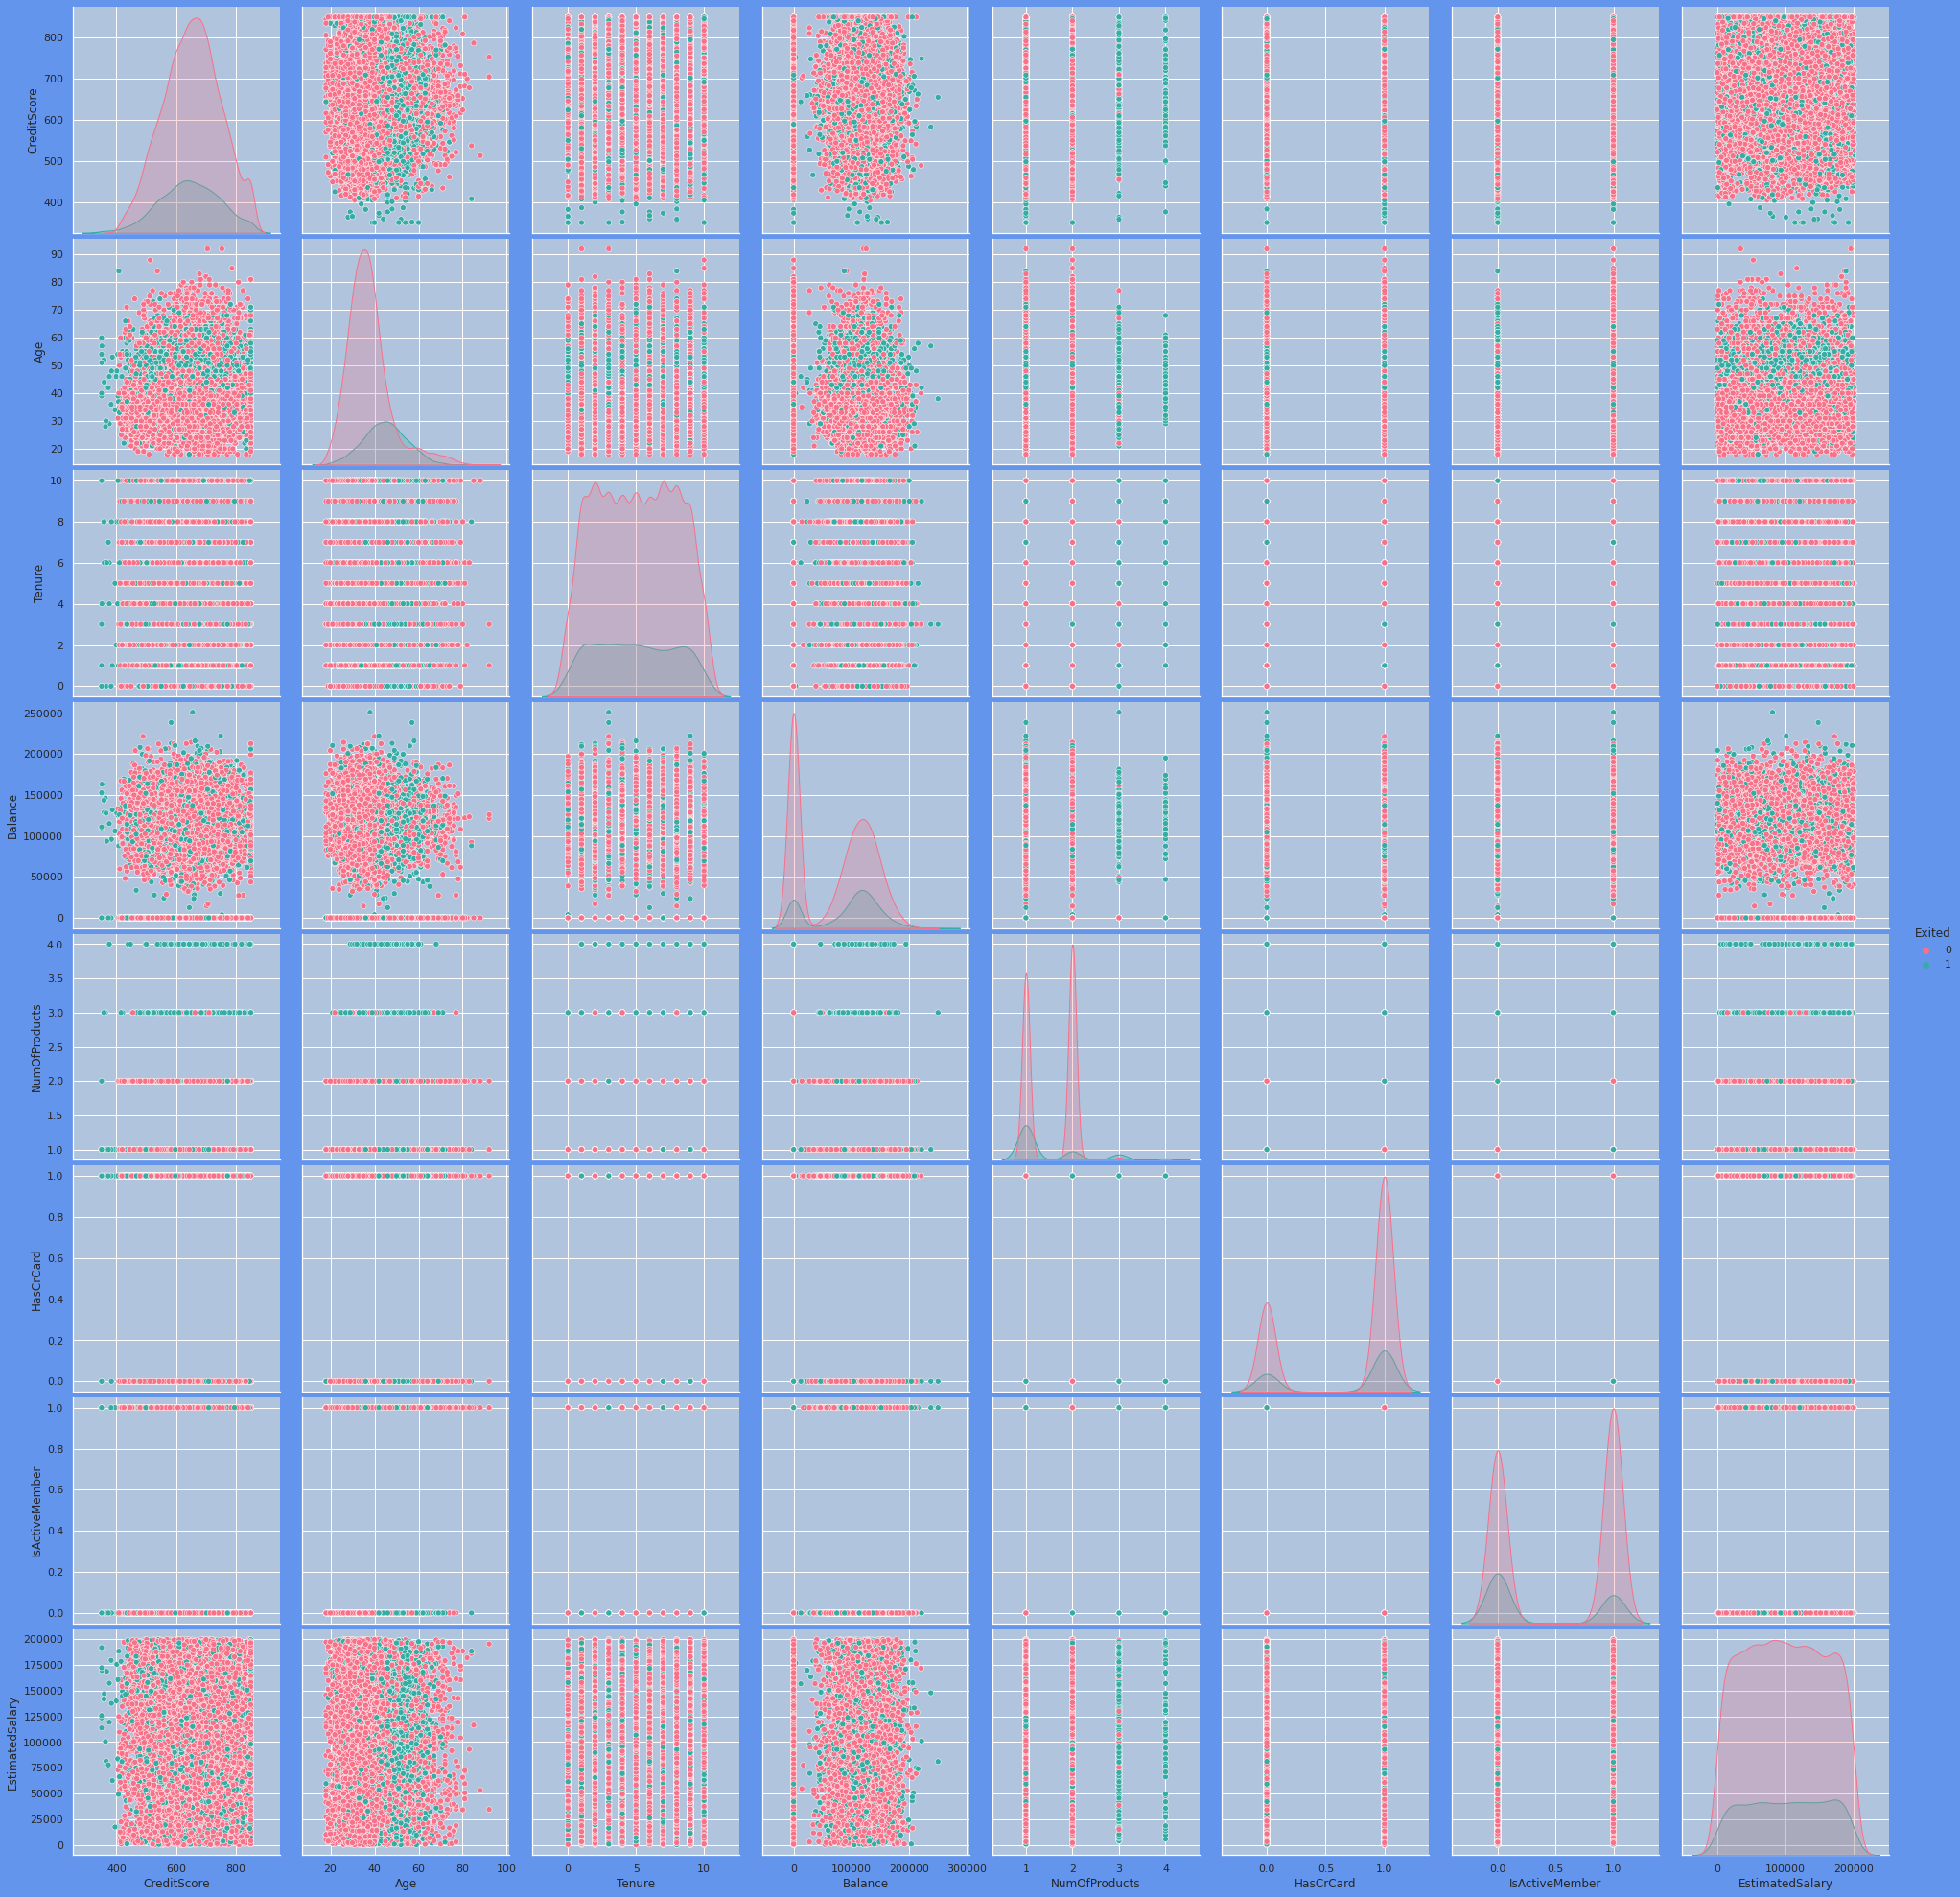

In [38]:
sns.pairplot(bank_data,hue = 'Exited',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)

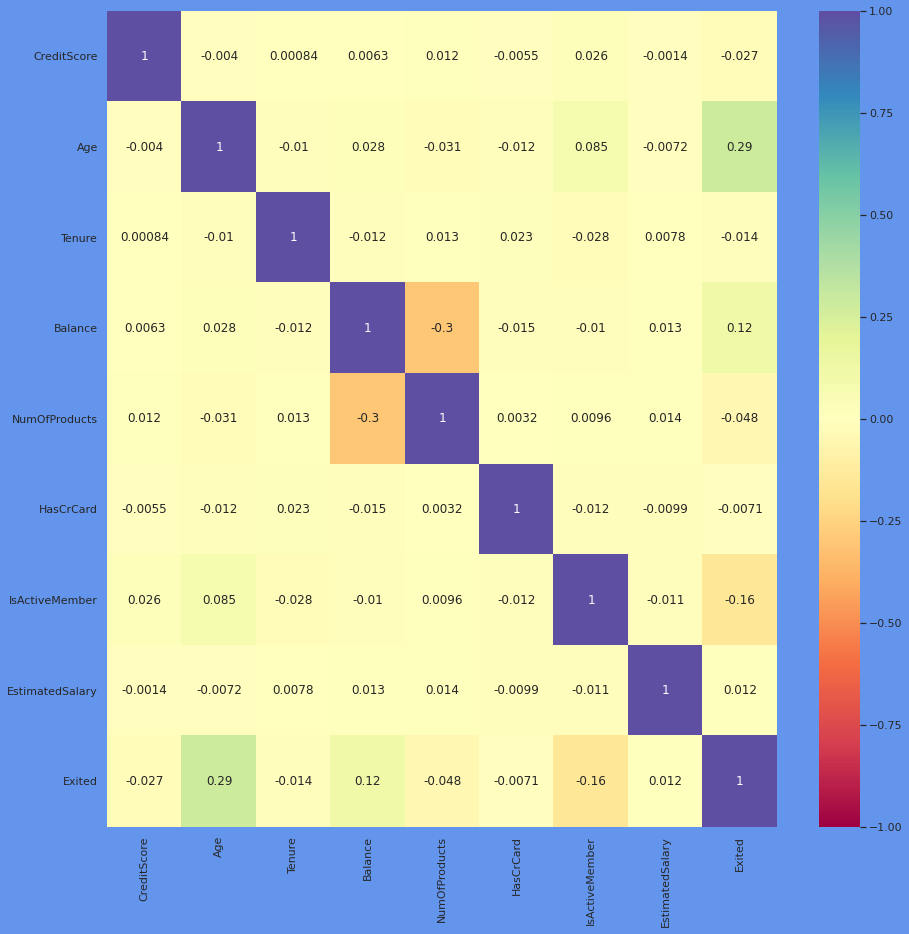

In [39]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(bank_data.corr(),cmap="Spectral",ax=ax,annot=True, vmax=1, vmin=-1)

*   **There is no correlation among the variables**



In [40]:
bank_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Outlier treatement

### check outliers

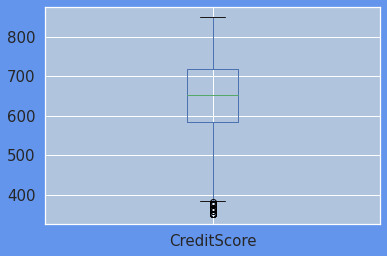

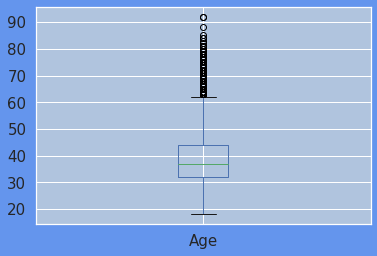

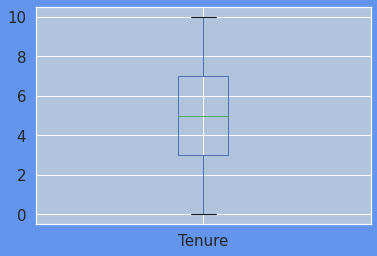

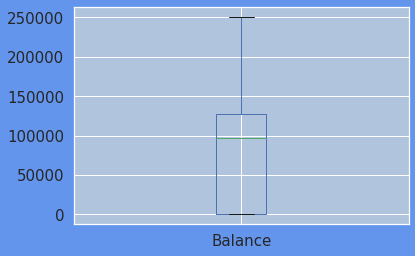

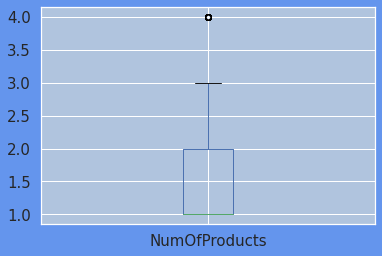

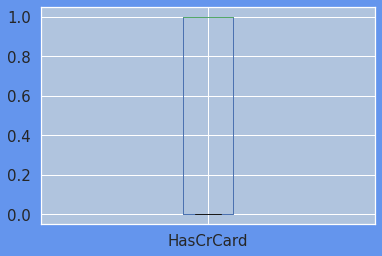

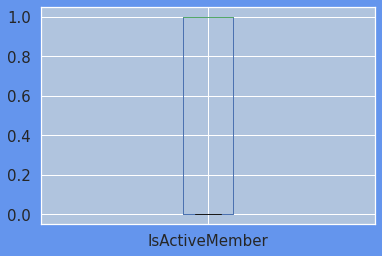

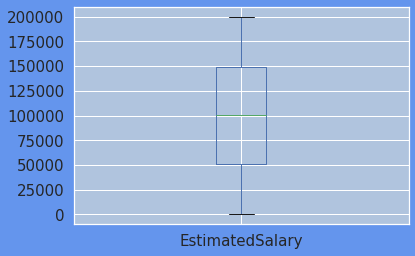

In [41]:
df_outl=[]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for i, c in enumerate(bank_data.columns):
    if (bank_data[c].dtype in numerics)==True and bank_data[c].name !='Exited':
        df_outl.append(bank_data[c].name)
        plt.figure(i)
        bank_data[c].plot(kind='box', subplots=True, layout=(4,4), fontsize=15, figsize = (30, 30))

In [42]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical variable
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [43]:
df_outl=[]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for i, c in enumerate(bank_data.columns):
    if (bank_data[c].dtype in numerics)==True and bank_data[c].name !='Exited':
        df_outl.append(bank_data[c].name)

In [44]:
bank_data = treat_outliers_all(bank_data,df_outl)

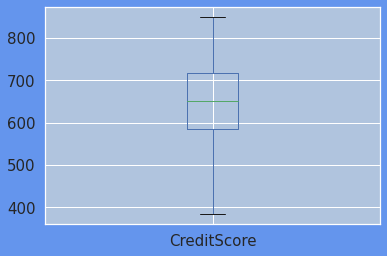

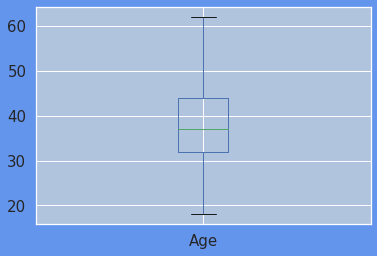

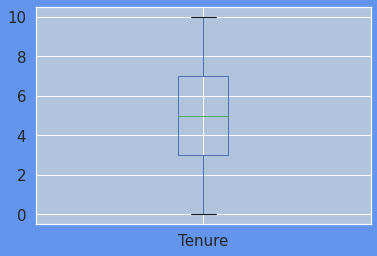

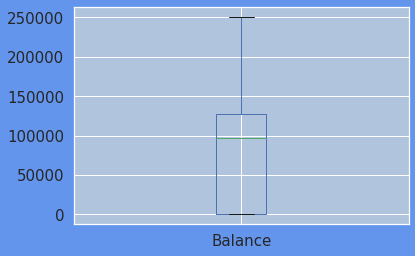

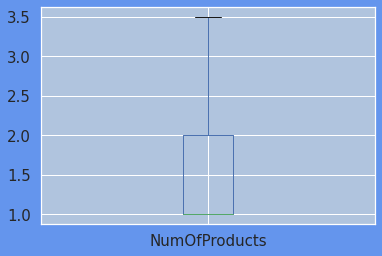

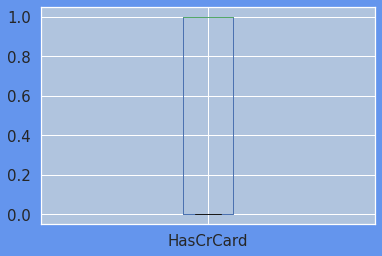

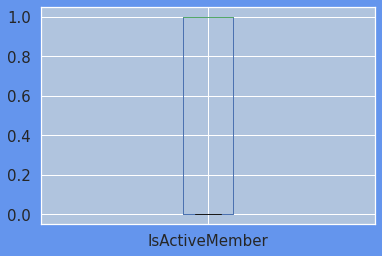

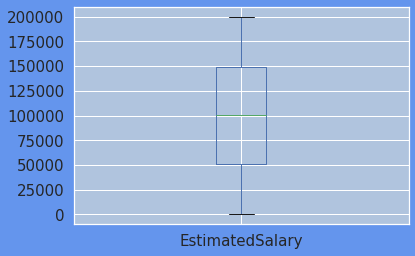

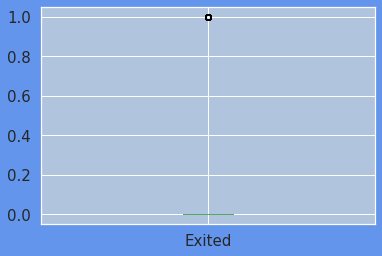

In [45]:
df_outl=[]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for i, c in enumerate(bank_data.columns):
    if (bank_data[c].dtype in numerics)==True:
        df_outl.append(bank_data[c].name)
        plt.figure(i)
        bank_data[c].plot(kind='box', subplots=True, layout=(4,4), fontsize=15, figsize = (30, 30))

**outliers has been succesfully remoed from the dataset**

# features and target have to be separeted

In [47]:
bank_data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

### label encoding of categorical values

In [48]:
le=LabelEncoder()
bank_data['Geography']=le.fit_transform(bank_data['Geography'])
bank_data['Gender']=le.fit_transform(bank_data['Gender'])

In [49]:
bank_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1.0,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1.0,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3.0,1,0,113931.57,1
3,699,0,0,39,1,0.00,2.0,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1.0,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2.0,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1.0,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1.0,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2.0,1,0,92888.52,1


## Splitting the dataset

### Targer variables and predictors

In [50]:
X=bank_data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y=bank_data['Exited']

## Split the dataset due to the unbalanced data with parameter stratify

In [51]:
#Splitting the training and test set with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1,stratify=y)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 10)
(2000, 10)
(8000,)
(2000,)


### *Rescaling the dataset*

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
#Printing the data after normalization
X_test

array([[-2.4519541 ,  1.51162316,  0.91301738, ...,  0.6493972 ,
         0.96728484, -0.67694445],
       [-1.18904072,  1.51162316,  0.91301738, ...,  0.6493972 ,
         0.96728484,  0.62277086],
       [ 0.09457617, -0.90311032, -1.0952694 , ...,  0.6493972 ,
        -1.03382164,  0.6402605 ],
       ...,
       [-0.15386581,  0.30425642,  0.91301738, ...,  0.6493972 ,
        -1.03382164, -0.07315735],
       [-0.73356376, -0.90311032,  0.91301738, ...,  0.6493972 ,
        -1.03382164, -1.66201046],
       [-0.97165399, -0.90311032,  0.91301738, ...,  0.6493972 ,
        -1.03382164,  1.62813847]])

## confusion matrix

In [55]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

# model building

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
random_forest = RandomForestClassifier(n_estimators=100)

In [58]:
# Pandas Series.ravel() function returns the flattened underlying data as an ndarray.
random_forest.fit(X_train,y_train.values.ravel())    # np.ravel() Return a contiguous flattened array

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
y_pred = random_forest.predict(X_test)

In [60]:
random_forest.score(X_test,y_test)

0.8655

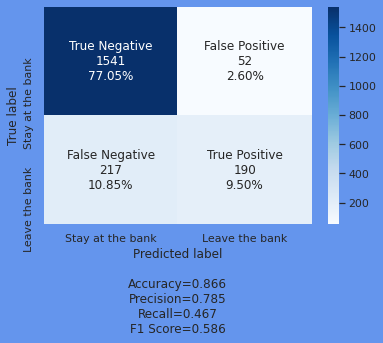

In [62]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = random_forest.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Stay at the bank','Leave the bank']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Precision is very bad after the running of random forest model is at 0.785 should be improved

## ROC curve

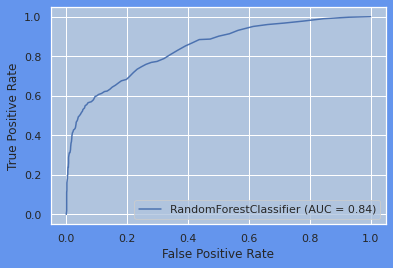

In [75]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(random_forest, X_test, y_test)
plt.show()

In [76]:
def plot_roc_curve(mod,fpr, tpr):
    plt.plot(mod,fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


## Model evaluation criterion
Wrong prediction possible as:
* To predict a customer who leaves the bank and in the reality stay
* To predict a customer who dont leaves the bank and in the reality close the connections with tha bank
**Which case is more important?* <br>
True Positiv rate is the most important to avoid false prediction so I use to evaluate the model according precision TP/TP+FP

Conclusion:

Precision is 0.78 that is not a good value have to be imporved



### Keras model will be created with Sequential class

In [77]:
model = Sequential()

### add input layer


*   units: number of nodes add to the layer 
*   activation: activation function (binary, sigmoid, relu, tanh, leaky relu,prelu, elu, softmax)
*   input_dim: number of nodes in the input layer 
*   kerner_initializer: intialize the weight randomly





In [78]:
model.add(Dense(units=5, activation='relu',kernel_initializer='uniform' ,input_dim = X.shape[1]))

### add second layer as hidden layer

In [79]:
model.add(Dense(units=5,kernel_initializer='uniform', activation='relu'))

### add output layer
*   units=1 because we have 2 outputs 0 or 1
*   activation: sigmoid due to the 2 possible outputs in case of more than 2 output softmax should be choosen



In [80]:
model.add(Dense(units=1,kernel_initializer='uniform' ,activation = 'sigmoid'))

### stochastic gradient descent for measuring  the generated error between the predicted and the true value


*   optimizer: the name of algorithm to find the best weights
*   loss: name of the loss function used in the compiler
*   metrics: accuracy has been choosen because the value 0 and 1 equally important



In [81]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 55        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [83]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
427/427 [==============================] - 2s 2ms/step - loss: 0.5313 - accuracy: 0.7969 - val_loss: 0.4513 - val_accuracy: 0.7906
Epoch 2/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4373 - accuracy: 0.7977 - val_loss: 0.4432 - val_accuracy: 0.7906
Epoch 3/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4331 - accuracy: 0.7977 - val_loss: 0.4401 - val_accuracy: 0.7906
Epoch 4/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4309 - accuracy: 0.7977 - val_loss: 0.4406 - val_accuracy: 0.7906
Epoch 5/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4299 - accuracy: 0.7977 - val_loss: 0.4376 - val_accuracy: 0.7906
Epoch 6/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4275 - accuracy: 0.7977 - val_loss: 0.4364 - val_accuracy: 0.7906
Epoch 7/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4258 - accuracy: 0.7977 - val_loss: 0.4360 - val_accuracy: 0.7906
Epoch 

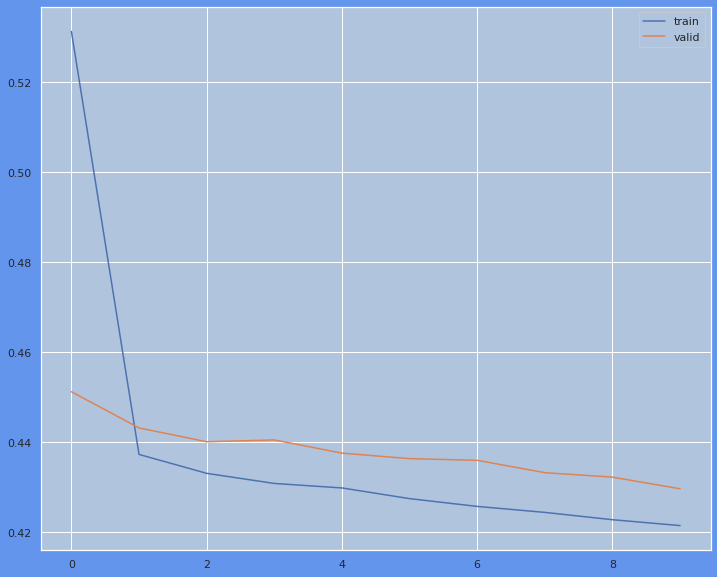

In [84]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(12,10))
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [85]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8245


In [86]:
print(score)

[0.41842448711395264, 0.8245000243186951]


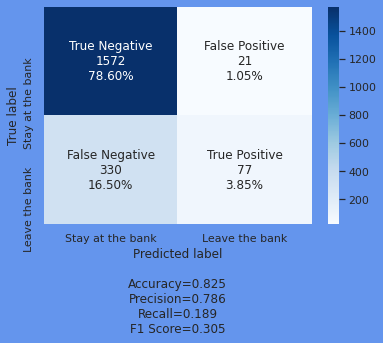

In [89]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred2 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred2[i]>0.5:
        y_pred2[i]=1 
    else:
        y_pred2[i]=0



cm2=confusion_matrix(y_test, y_pred2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Stay at the bank','Leave the bank']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Precision has a little better value in comparison of the random forest model

## which metric is right for model performance evaluation and why?

**Precision is the best metric for the models because it is important to know how many customer will leave the bank**

ANN in comparison with the random forest model shows a better precision although the recall is far away from a good value

## Model tuning

*increasing the number of epochs*

In [95]:
model = Sequential()
model.add(Dense(units=5, activation='relu',kernel_initializer='uniform' ,input_dim = X.shape[1]))
model.add(Dense(units=5,kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=1,kernel_initializer='uniform' ,activation = 'sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [96]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [97]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=100,validation_split=0.2)

Epoch 1/100
427/427 [==============================] - 1s 2ms/step - loss: 0.5345 - accuracy: 0.7978 - val_loss: 0.4482 - val_accuracy: 0.7906
Epoch 2/100
427/427 [==============================] - 1s 1ms/step - loss: 0.4362 - accuracy: 0.7977 - val_loss: 0.4416 - val_accuracy: 0.7906
Epoch 3/100
427/427 [==============================] - 1s 2ms/step - loss: 0.4324 - accuracy: 0.7977 - val_loss: 0.4392 - val_accuracy: 0.7906
Epoch 4/100
427/427 [==============================] - 1s 2ms/step - loss: 0.4302 - accuracy: 0.7977 - val_loss: 0.4368 - val_accuracy: 0.7906
Epoch 5/100
427/427 [==============================] - 1s 2ms/step - loss: 0.4283 - accuracy: 0.7977 - val_loss: 0.4349 - val_accuracy: 0.7906
Epoch 6/100
427/427 [==============================] - 1s 2ms/step - loss: 0.4261 - accuracy: 0.7977 - val_loss: 0.4330 - val_accuracy: 0.7906
Epoch 7/100
427/427 [==============================] - 1s 1ms/step - loss: 0.4245 - accuracy: 0.8020 - val_loss: 0.4313 - val_accuracy: 0.8138

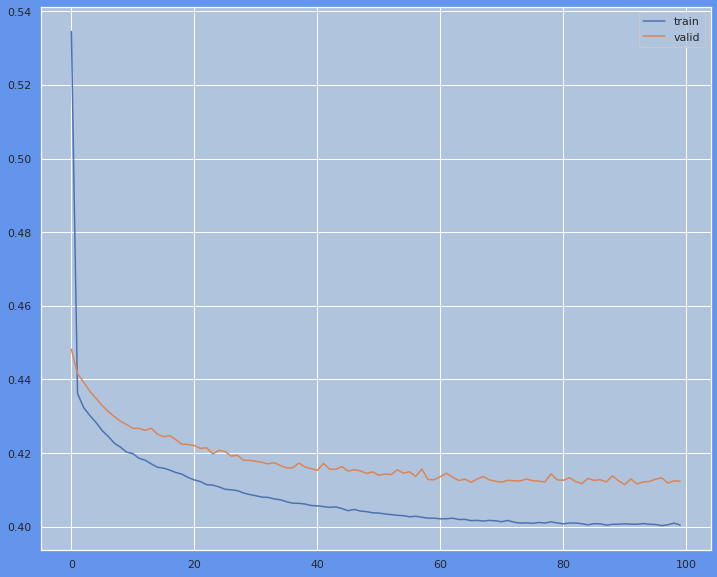

In [98]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(12,10))
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [99]:
score = model.evaluate(X_test, y_test)
print(score)

63/63 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8405
[0.3939952552318573, 0.840499997138977]


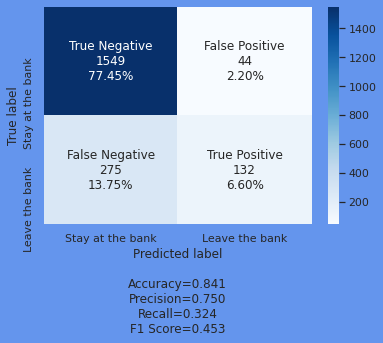

In [100]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred2 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred2[i]>0.5:
        y_pred2[i]=1 
    else:
        y_pred2[i]=0



cm2=confusion_matrix(y_test, y_pred2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Stay at the bank','Leave the bank']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

After increasing the number of epochs the precision decreased from 0.786 to 0.750

<hr>

*additional hidden layer*

In [108]:
model = Sequential()
model.add(Dense(units=5, activation='relu',kernel_initializer='uniform' ,input_dim = X.shape[1]))
model.add(Dense(units=5,kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=5,kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=1,kernel_initializer='uniform' ,activation = 'sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [103]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 6         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [104]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
427/427 [==============================] - 1s 2ms/step - loss: 0.5324 - accuracy: 0.7973 - val_loss: 0.4510 - val_accuracy: 0.7906
Epoch 2/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4363 - accuracy: 0.7977 - val_loss: 0.4409 - val_accuracy: 0.7906
Epoch 3/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4303 - accuracy: 0.7977 - val_loss: 0.4355 - val_accuracy: 0.7906
Epoch 4/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4260 - accuracy: 0.7977 - val_loss: 0.4316 - val_accuracy: 0.7906
Epoch 5/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4228 - accuracy: 0.8036 - val_loss: 0.4300 - val_accuracy: 0.8181
Epoch 6/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4216 - accuracy: 0.8206 - val_loss: 0.4267 - val_accuracy: 0.8231
Epoch 7/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4201 - accuracy: 0.8266 - val_loss: 0.4260 - val_accuracy: 0.8263
Epoch 

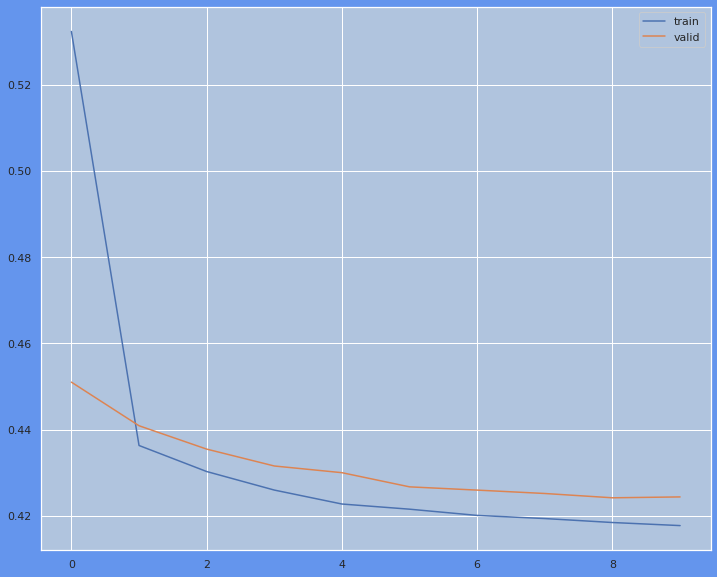

In [105]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(12,10))
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [106]:
score = model.evaluate(X_test, y_test)
print(score)

63/63 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8360
[0.41243159770965576, 0.8360000252723694]


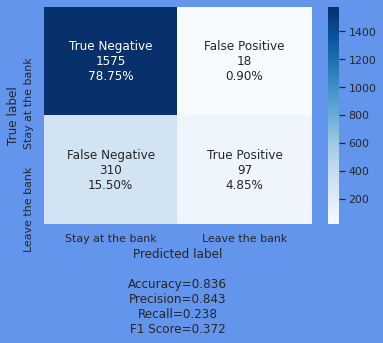

In [107]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred2 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred2[i]>0.5:
        y_pred2[i]=1 
    else:
        y_pred2[i]=0



cm2=confusion_matrix(y_test, y_pred2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Stay at the bank','Leave the bank']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

After using an additional hidden layer a performance of precision is much more better is at 0.843

<hr>

*add batch normalization*


In [111]:
from keras.layers import BatchNormalization
model = Sequential()
model.add(Dense(units=5, activation='relu',kernel_initializer='uniform' ,input_dim = X.shape[1]))
model.add(BatchNormalization())
model.add(Dense(units=5,kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=1,kernel_initializer='uniform' ,activation = 'sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [112]:
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 5)                 55        
_________________________________________________________________
batch_normalization (BatchNo (None, 5)                 20        
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 6         
Total params: 111
Trainable params: 101
Non-trainable params: 10
_________________________________________________________________


In [113]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
427/427 [==============================] - 1s 2ms/step - loss: 0.5172 - accuracy: 0.7977 - val_loss: 0.4357 - val_accuracy: 0.7906
Epoch 2/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4213 - accuracy: 0.7977 - val_loss: 0.4076 - val_accuracy: 0.7906
Epoch 3/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4012 - accuracy: 0.7977 - val_loss: 0.3918 - val_accuracy: 0.7906
Epoch 4/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3977 - accuracy: 0.7977 - val_loss: 0.3917 - val_accuracy: 0.7906
Epoch 5/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3972 - accuracy: 0.7977 - val_loss: 0.3839 - val_accuracy: 0.7906
Epoch 6/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3941 - accuracy: 0.8105 - val_loss: 0.3825 - val_accuracy: 0.8469
Epoch 7/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3908 - accuracy: 0.8356 - val_loss: 0.3845 - val_accuracy: 0.8425
Epoch 

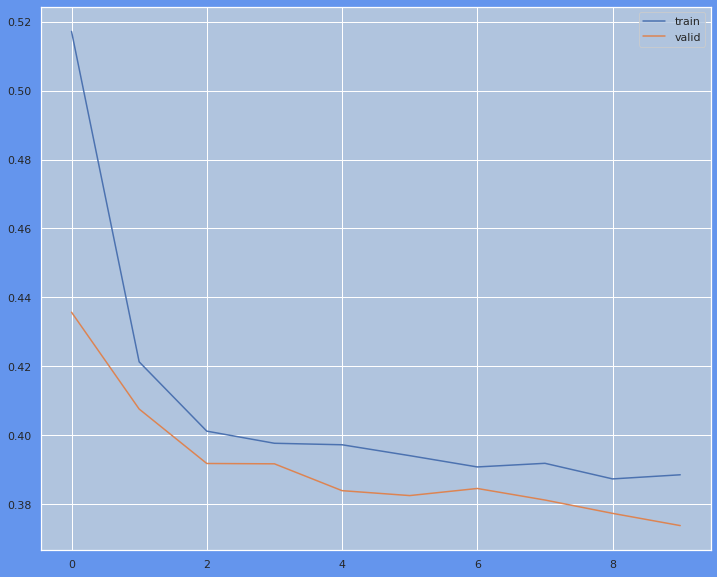

In [114]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.figure(figsize=(12,10))
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [115]:
score = model.evaluate(X_test, y_test)
print(score)

63/63 [==============================] - 0s 1ms/step - loss: 0.3817 - accuracy: 0.8590
[0.38167697191238403, 0.859000027179718]


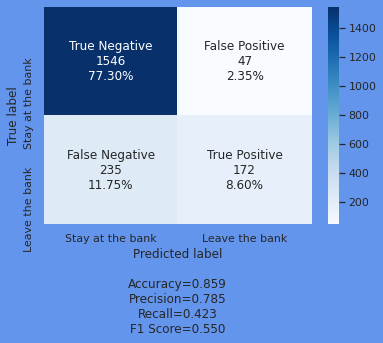

In [116]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred2 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred2[i]>0.5:
        y_pred2[i]=1 
    else:
        y_pred2[i]=0



cm2=confusion_matrix(y_test, y_pred2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Stay at the bank','Leave the bank']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

The batch normalization didnt brought a better result in precision

# **Model Performance Evaluation**

summarize the models perfomance

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Model</th>
      <th>Precision</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Random forest</td>
      <td>0.785</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Sequantial ANN Model</td>
      <td>0.786</td>
    </tr>
    <tr>
      <th>2</th>
      <td>incr. Number of epochs</td>
      <td>0.750</td>
    </tr>
    <tr>
      <th>3</th>
      <td>add hidden layer</td>
      <td>0.843</td>
    </tr>
    <tr>
      <th>4</th>
      <td>batch normalization</td>
      <td>0.785</td>
    </tr>
  </tbody>
</table>

only the adding hidden layer brought a better performance in the model building at the other tuning method is no change in the precision values, there are more tuning possibilitier that could cause more changes and bring a better perfromance

# **Conclusion and key takeaways**

Model tuning is not always bring a better performance there should be more try to reach the desired results. At the prediction if the customer leave or stay at the bank the most important the precision to say sure that the customer leave the bank. Bank have to take countermeasures. 